In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve, precision_recall_curve, auc

In [2]:
# добавить к predictors данные по инфляции

In [3]:
df = pd.read_csv('для-python.csv')
df = df.iloc[0:156]
df.reset_index(drop=True, inplace=True)

In [4]:
df['Дата'] = df['Дата'].astype(int)
df['Месяц'] = df['Месяц'].astype(int)

In [1]:
df[['Гос. облигации (ОФЗ) Первичный рынок', 'Корпоративные Первичный рынок', 
   'Гос. облигации (ОФЗ) Вторичный рынок',  'Корпоративные Вторичный рынок']]*=10**(-9)
# перевод единиц измерений в млрд. рублей

NameError: name 'df' is not defined

In [6]:
df

,Дата,Месяц,Гос. облигации (ОФЗ) Первичный рынок,Корпоративные Первичный рынок,Гос. облигации (ОФЗ) Вторичный рынок,Корпоративные Вторичный рынок,Ставка,Структурный профицит/дефицит,Доли нерезидентов,Cbonds-CBI RU BBB/ruAA- YTM eff,Cbonds-CBI RU BB/ruBBB YTM eff,Cbonds-CBI RU B/ruB- YTM eff,Cbonds-CBI RU High Yield YTM eff,Cbonds-GBI RU YTM eff
0,2008,1,26.778840,10.360000,48.014893,138.604431,NaN,-346.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,2,25.577192,49.150300,47.741901,166.732781,NaN,-7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,3,26.446141,59.681575,283.219242,196.161155,NaN,-110.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,4,28.184176,78.349413,43.177137,307.174296,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,5,11.610469,15.730400,47.429255,215.463436,NaN,-225.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2020,8,181.928003,99.666123,302.890811,166.354101,4.2,-1593.0,29.8,5.85,6.37,6.92,11.56,5.72
152,2020,9,858.974659,167.047784,492.742856,201.289551,4.2,-1442.0,29.4,5.81,6.29,6.81,11.38,5.89
153,2020,10,1437.451211,307.339093,498.353878,248.558204,4.2,-640.0,26.8,5.88,6.59,6.71,11.43,5.84
154,2020,11,782.882688,170.478183,460.668486,193.284798,4.2,-293.0,24.0,5.80,6.38,6.54,10.65,5.65


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Дата                                  156 non-null    int64  
 1   Месяц                                 156 non-null    int64  
 2   Гос. облигации (ОФЗ) Первичный рынок  156 non-null    float64
 3   Корпоративные Первичный рынок         156 non-null    float64
 4   Гос. облигации (ОФЗ) Вторичный рынок  156 non-null    float64
 5   Корпоративные Вторичный рынок         156 non-null    float64
 6   Ставка                                88 non-null     float64
 7   Структурный профицит/дефицит          156 non-null    float64
 8   Доли нерезидентов                     108 non-null    float64
 9   Cbonds-CBI RU BBB/ruAA- YTM eff       120 non-null    float64
 10  Cbonds-CBI RU BB/ruBBB YTM eff        120 non-null    float64
 11  Cbonds-CBI RU B/ruB

In [8]:
df.nunique()

Дата                                     13
Месяц                                    12
Гос. облигации (ОФЗ) Первичный рынок    148
Корпоративные Первичный рынок           156
Гос. облигации (ОФЗ) Вторичный рынок    156
Корпоративные Вторичный рынок           156
Ставка                                   25
Структурный профицит/дефицит            155
Доли нерезидентов                        88
Cbonds-CBI RU BBB/ruAA- YTM eff         103
Cbonds-CBI RU BB/ruBBB YTM eff          109
Cbonds-CBI RU B/ruB- YTM eff            114
Cbonds-CBI RU High Yield YTM eff         35
Cbonds-GBI RU YTM eff                   115
dtype: int64

Text(0.5, 0.98, 'Зависимость объемов выпуска корп. бондв и ОФЗ ')

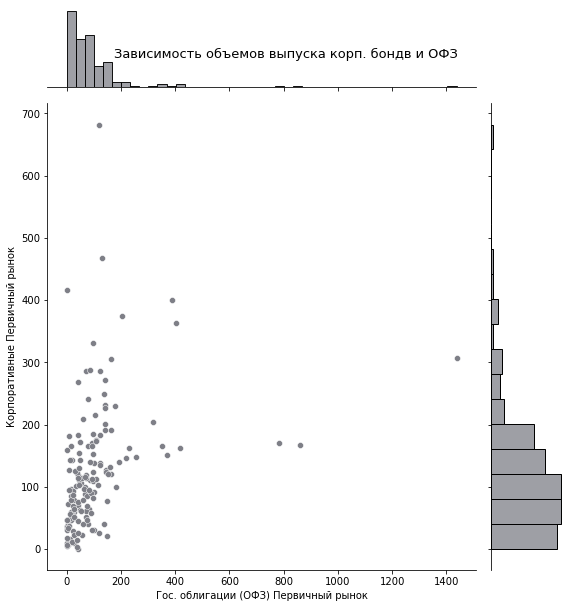

In [9]:
ax = sns.jointplot(data = df, x = 'Гос. облигации (ОФЗ) Первичный рынок', y = 'Корпоративные Первичный рынок', 
              color="#7e7f87", height = 8)


##### a = sns.jointplot(data = df, x = 'Гос. облигации (ОФЗ) Первичный рынок', y = 'Корпоративные Вторичный рынок',
              color = '#eb5454', height=8, ratio=2)

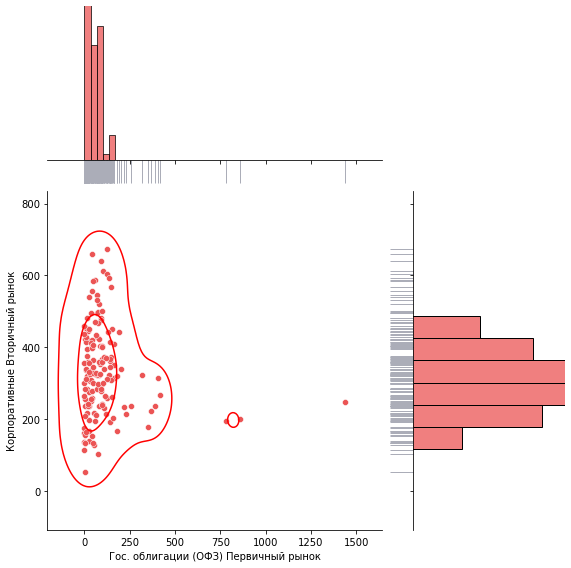

In [10]:
# Это просто пример того, как можно поиграться с представленимем. Понимаю, что до красивого оформеления еще далеко,
# но под конец на него не остается времени
a = sns.jointplot(data = df, x = 'Гос. облигации (ОФЗ) Первичный рынок', y = 'Корпоративные Вторичный рынок',
              color = '#eb5454', height=8, ratio=2)
a.plot_marginals(sns.rugplot, color="#abadb8", height=-.15, clip_on=False)
a.plot_joint(sns.kdeplot, color="r", zorder=10, levels=3)

Text(0.5, 0.98, 'Зависимость объемов ОФЗ со вторичным рынком')

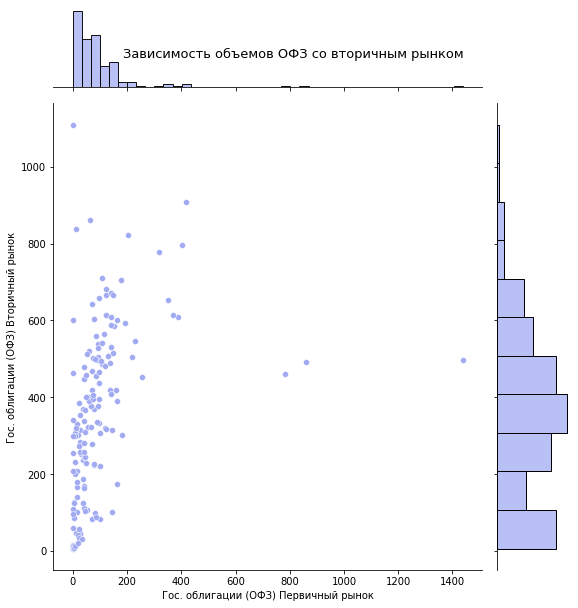

In [8]:
ax = sns.jointplot(data = df, x = 'Гос. облигации (ОФЗ) Первичный рынок', y = 'Гос. облигации (ОФЗ) Вторичный рынок',
              color = '#a2abf2', height=8)
plt.subplots_adjust(top=1.05)
ax.fig.suptitle('Зависимость объемов ОФЗ со вторичным рынком', fontsize = 13)

In [12]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Дата,Месяц,Гос. облигации (ОФЗ) Первичный рынок,Корпоративные Первичный рынок,Гос. облигации (ОФЗ) Вторичный рынок,Корпоративные Вторичный рынок,Ставка,Структурный профицит/дефицит,Доли нерезидентов,Cbonds-CBI RU BBB/ruAA- YTM eff,Cbonds-CBI RU BB/ruBBB YTM eff,Cbonds-CBI RU B/ruB- YTM eff,Cbonds-CBI RU High Yield YTM eff,Cbonds-GBI RU YTM eff
Дата,1.00,0.00,0.49,0.49,0.78,-0.13,-0.46,-0.29,0.73,-0.22,-0.18,-0.21,-0.43,-0.07
Месяц,0.00,1.00,0.06,0.30,0.03,0.15,-0.16,0.05,0.10,-0.05,-0.01,-0.05,-0.11,-0.03
Гос. облигации (ОФЗ) Первичный рынок,0.49,0.06,1.00,0.36,0.36,-0.11,-0.39,-0.27,0.24,-0.39,-0.36,-0.39,-0.52,-0.35
Корпоративные Первичный рынок,0.49,0.30,0.36,1.00,0.46,0.23,-0.18,-0.12,0.24,-0.18,-0.17,-0.20,-0.31,-0.16
Гос. облигации (ОФЗ) Вторичный рынок,0.78,0.03,0.36,0.46,1.00,0.19,-0.45,-0.25,0.56,-0.44,-0.42,-0.38,0.24,-0.32
Корпоративные Вторичный рынок,-0.13,0.15,-0.11,0.23,0.19,1.00,0.18,0.35,-0.31,0.01,-0.02,0.01,-0.29,-0.07
Ставка,-0.46,-0.16,-0.39,-0.18,-0.45,0.18,1.00,0.50,-0.56,0.93,0.89,0.93,0.65,0.88
Структурный профицит/дефицит,-0.29,0.05,-0.27,-0.12,-0.25,0.35,0.50,1.00,-0.52,0.65,0.63,0.63,-0.55,0.64
Доли нерезидентов,0.73,0.10,0.24,0.24,0.56,-0.31,-0.56,-0.52,1.00,-0.35,-0.30,-0.41,0.02,-0.30
Cbonds-CBI RU BBB/ruAA- YTM eff,-0.22,-0.05,-0.39,-0.18,-0.44,0.01,0.93,0.65,-0.35,1.00,0.98,0.95,0.74,0.98


In [9]:
df.columns

Index(['Дата', 'Месяц', 'Гос. облигации (ОФЗ) Первичный рынок',
       'Корпоративные Первичный рынок', 'Гос. облигации (ОФЗ) Вторичный рынок',
       'Корпоративные Вторичный рынок', 'Ставка',
       'Структурный профицит/дефицит', 'Доли нерезидентов',
       'Cbonds-CBI RU BBB/ruAA- YTM eff', 'Cbonds-CBI RU BB/ruBBB YTM eff',
       'Cbonds-CBI RU B/ruB- YTM eff', 'Cbonds-CBI RU High Yield YTM eff',
       'Cbonds-GBI RU YTM eff'],
      dtype='object')


Надо подумать как по-умному использовать данные, поскольку если делать через stats model (sm.OLS) с параметром missing, то это эквивалентно тому, чтобы выкинуть все данные с нанами (построчно)массив данных у нас маленький, поэтому так не вариант.

Можно попробовать строить коэффициенты по отдельности и смотерть тогда без корреляционной матрицы.

In [10]:
data = df.iloc[69:156]

In [11]:
predictor = ['Гос. облигации (ОФЗ) Первичный рынок', 'Ставка','Структурный профицит/дефицит', 'Доли нерезидентов', 
             'Cbonds-CBI RU BBB/ruAA- YTM eff', 'Cbonds-CBI RU BB/ruBBB YTM eff', 'Cbonds-CBI RU B/ruB- YTM eff', 
             'Cbonds-GBI RU YTM eff'
            ]
y = data['Корпоративные Первичный рынок'].values
X = data[predictor].values

In [12]:
data_train, data_test = train_test_split(data, test_size = 0.15, random_state=14)

y_train = data_train[['Корпоративные Первичный рынок']]
y_test = data_test[['Корпоративные Первичный рынок']]

X_train = data_train[predictor]
X_test = data_test[predictor]

In [13]:
X_train

,Гос. облигации (ОФЗ) Первичный рынок,Ставка,Структурный профицит/дефицит,Доли нерезидентов,Cbonds-CBI RU BBB/ruAA- YTM eff,Cbonds-CBI RU BB/ruBBB YTM eff,Cbonds-CBI RU B/ruB- YTM eff,Cbonds-GBI RU YTM eff
154,782.882688,4.2,-293.0,24.0,5.80,6.38,6.54,5.65
126,141.429592,7.2,-3524.0,28.2,7.61,8.36,9.29,7.65
134,256.478609,7.8,-2992.0,25.9,8.61,9.27,9.81,8.18
92,44.529095,11.0,3932.0,20.7,12.06,12.78,14.18,11.17
118,114.500145,8.2,-1453.0,32.7,8.04,8.81,10.38,7.55
...,...,...,...,...,...,...,...,...
79,0.000000,8.0,5030.0,24.9,9.70,10.23,11.52,9.64
97,73.901338,11.0,1522.0,21.0,11.21,12.21,14.30,9.72
140,94.564380,7.0,-2882.0,29.7,7.39,7.92,8.34,6.96
91,27.416612,11.0,4051.0,20.0,12.40,13.59,14.43,11.65


In [14]:
y_test

,Корпоративные Первичный рынок
71,209.119668
103,112.710000
108,26.097365
139,81.389716
131,268.568222
133,131.366269
102,123.349980
75,37.490544
104,174.900532
117,182.823098


In [15]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

In [16]:
# X_test = scaler.transform(X_test)

In [17]:
reg = LinearRegression()
reg_fit = reg.fit(X_train, y_train)
np.round(reg_fit.coef_)

array([[  0.,  49.,   0.,  -5.,   2.,  12., -50., -49.]])

In [22]:
# yhat_test_reg = reg_fit.predict(X_test)
# np.sum((y_test.to_numpy() - yhat_test_reg) ** 2)

In [23]:
reg_fit.intercept_

array([678.4445667])

In [24]:
y_pred = pd.DataFrame(reg_fit.predict(X_test))
y_pred.rename(columns={0:'predicted'}, inplace = True)
y_pred

,predicted
0,127.951817
1,212.806561
2,193.476667
3,196.328066
4,116.212091
5,138.800155
6,183.463067
7,146.370322
8,233.702909
9,146.834945


In [25]:
y_test.reset_index()

,index,Корпоративные Первичный рынок
0,71,209.119668
1,103,112.710000
2,108,26.097365
3,139,81.389716
4,131,268.568222
5,133,131.366269
6,102,123.349980
7,75,37.490544
8,104,174.900532
9,117,182.823098


In [117]:
a = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [118]:
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
new = []
for i in a:
    for j in quarters:
        a = str(i)+j
        new.append(a)

In [119]:
ofz = []
corp = []

In [120]:
for i in range(52):
    ofz.append(df.iloc[3*i:3*i+3, 2:4].mean()[0])
    corp.append(df.iloc[3*i:3*i+3, 2:4].mean()[1])

In [121]:
dataa = {'Гос. облигации (ОФЗ) Первичный рынок':ofz, 'Корпоративные Первичный рынок':corp}
qd=pd.DataFrame(data = dataa, index=new)
qd = qd.reset_index()
qd = qd.rename(columns={'index':'Дата'})

In [122]:
qd['Дата'] = pd.to_datetime(qd['Дата'])

In [123]:
qd.set_index('Дата', inplace=True)

In [124]:
qd1 = qd.stack().reset_index().set_index('Дата').rename(columns={'level_1': 'Status', 0: 'Values'})

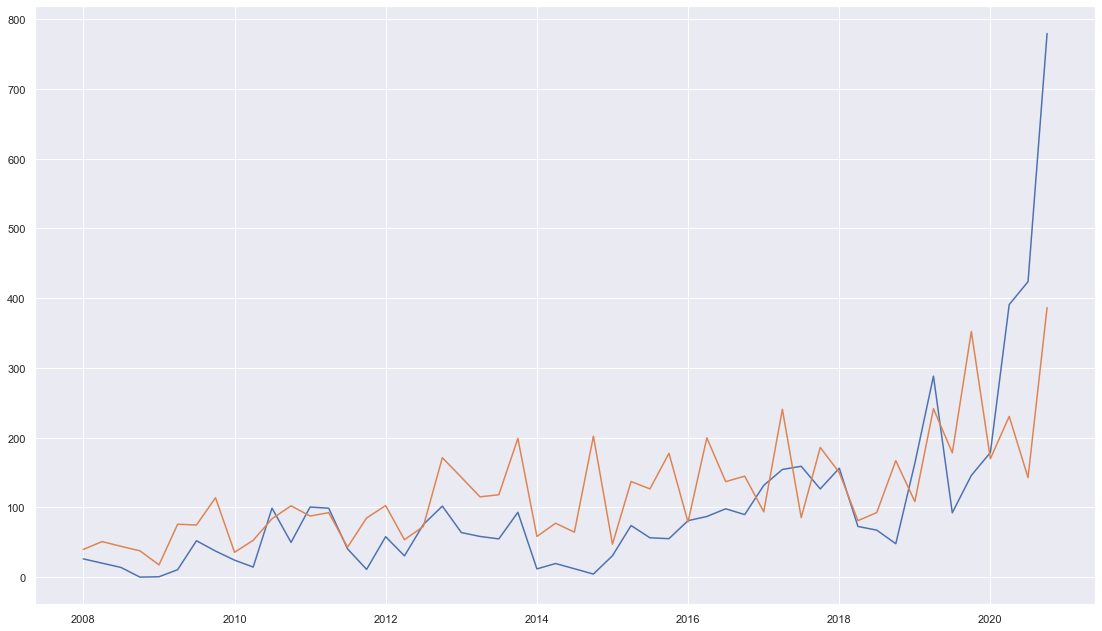

In [125]:
plt.plot(qd)

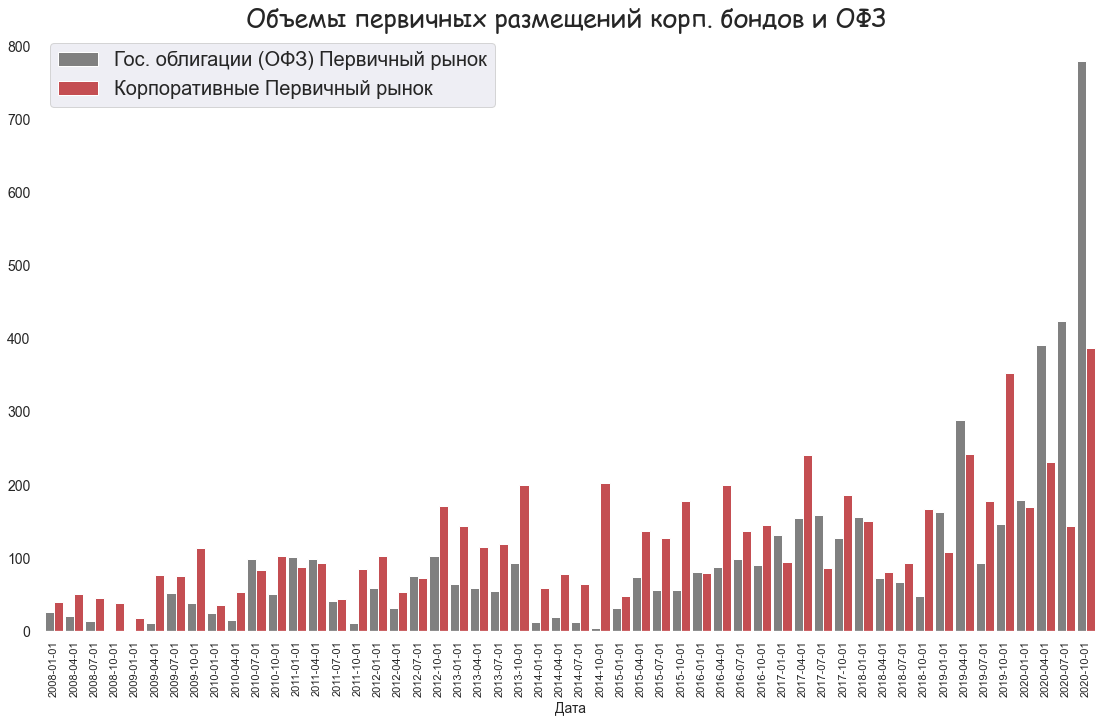

In [126]:
sns.set(rc={'figure.figsize':(19,11)})
ax = qd.plot.bar(color=["grey", 'r'],  width=0.9)
ax.set_title('Объемы первичных размещений корп. бондов и ОФЗ ', fontfamily = 'fantasy',fontstyle = 'oblique',
                fontsize = 25)
ax.xaxis.set_major_formatter(plt.FixedFormatter(qd.index.to_series().dt.strftime("%Y-%m-%d")))
ax.set_facecolor('white')
plt.legend(loc = 'upper left',fontsize = 20)
plt.savefig("perv", dpi=200)
plt.yticks(fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.show()

In [127]:
ofz = []
ofz2 = []
corp2=[]
for i in range(52):
    ofz.append(df.iloc[3*i:3*i+3, [2,4,5]].mean()[0])
    ofz2.append(df.iloc[3*i:3*i+3, [2,4,5]].mean()[1])
    corp2.append(df.iloc[3*i:3*i+3, [2,4,5]].mean()[2])
    

In [128]:
dataa = {'ОФЗ размещение':ofz, 'ОФЗ (вторичный сектор)' : ofz2,'Корпоративные облигации (вторичный сектор)':corp2}
qd=pd.DataFrame(data = dataa, index=new)
qd = qd.reset_index()
qd = qd.rename(columns={'index':'Дата'})

In [129]:
qd['Дата'] = pd.to_datetime(qd['Дата'])
qd.set_index('Дата', inplace=True)
qd1 = qd.stack().reset_index().set_index('Дата').rename(columns={'level_1': 'Status', 0: 'Values'})

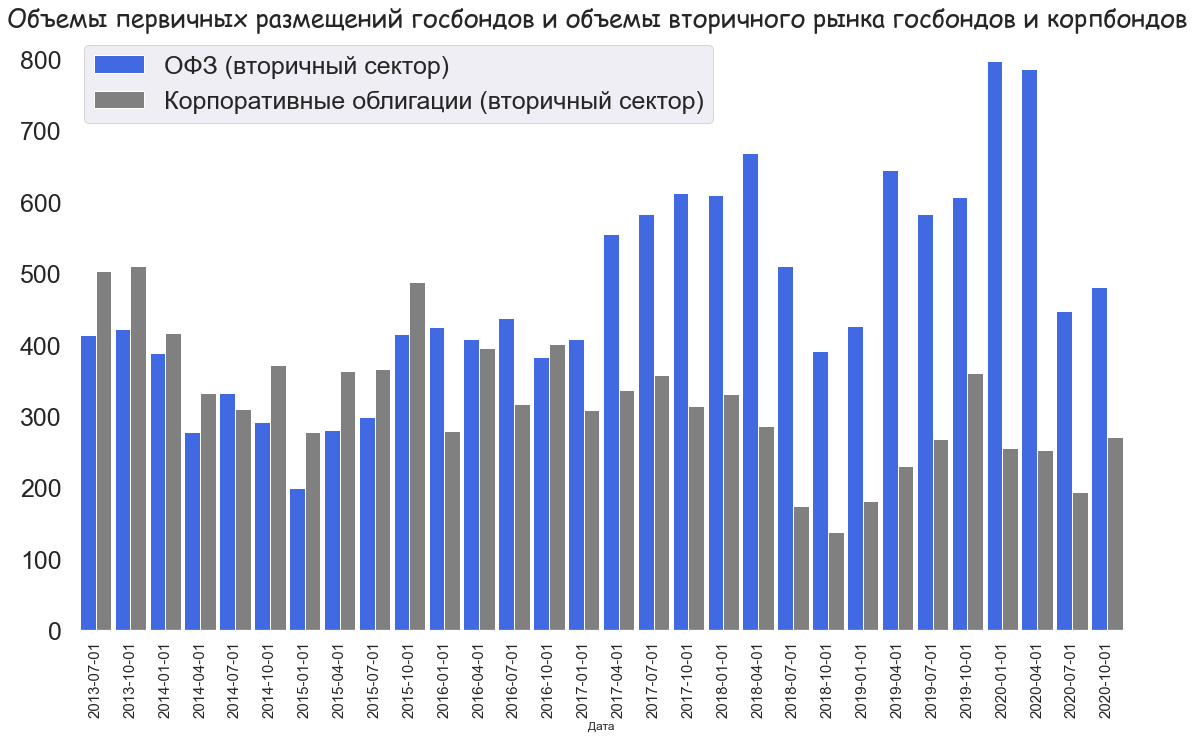

In [145]:
sns.set(rc={'figure.figsize':(19,11)})
ax = qd.plot.bar(color=['royalblue', "grey", 'r'],  width=0.9)
ax.set_title('Объемы первичных размещений госбондов и объемы вторичного рынка госбондов и корпбондов ', fontfamily = 'fantasy',fontstyle = 'oblique',
                fontsize = 25)
ax.xaxis.set_major_formatter(plt.FixedFormatter(qd.index.to_series().dt.strftime("%Y-%m-%d")))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 25)
plt.legend(loc = 'upper left',fontsize = 25)
plt.grid()
ax.set_facecolor('white')
plt.savefig("econd", dpi=200)
plt.show()

In [131]:
ofz2 = []
corp2=[]
for i in range(52):
    ofz2.append(df.iloc[3*i:3*i+3, [4,5]].mean()[0])
    corp2.append(df.iloc[3*i:3*i+3, [4,5]].mean()[1])
    

In [132]:
dataa = {'ОФЗ (вторичный сектор)' : ofz2,'Корпоративные облигации (вторичный сектор)':corp2}
qd=pd.DataFrame(data = dataa, index=new)
qd = qd.reset_index()
qd = qd.rename(columns={'index':'Дата'})

In [133]:
qd['Дата'] = pd.to_datetime(qd['Дата'])
qd.set_index('Дата', inplace=True)
qd1 = qd.stack().reset_index().set_index('Дата').rename(columns={'level_1': 'Status', 0: 'Values'})

[]

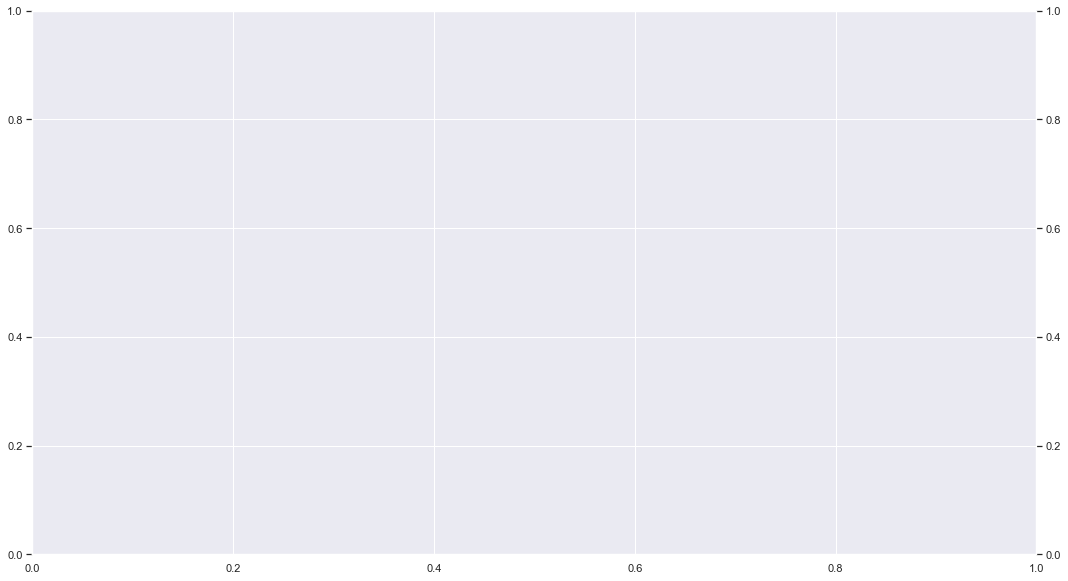

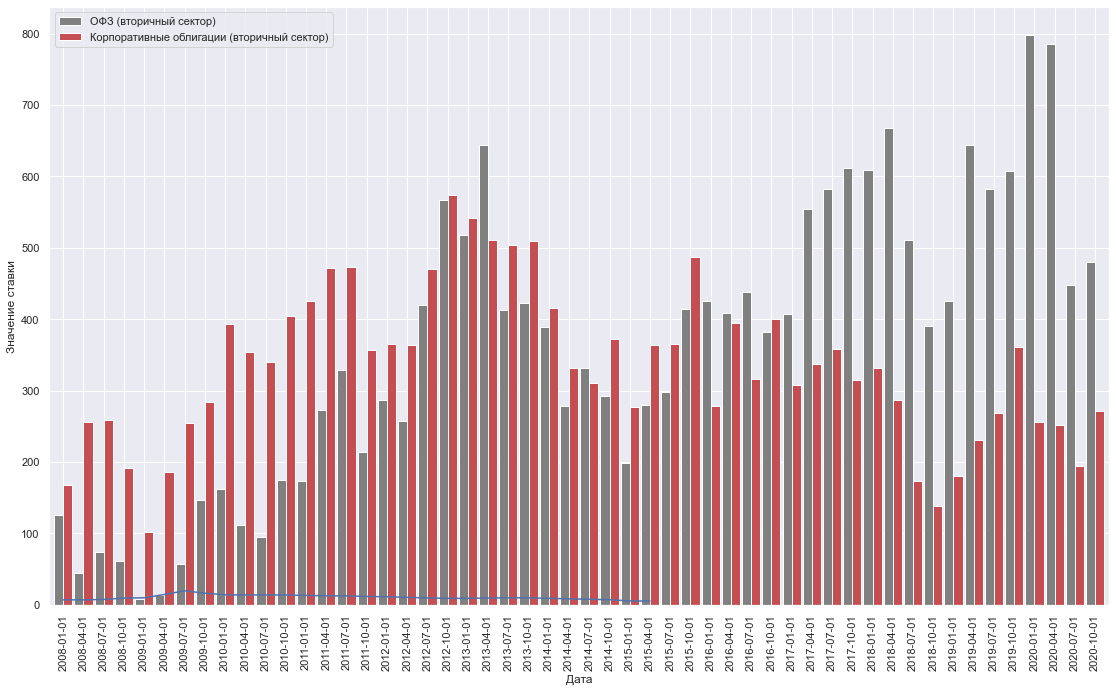

In [134]:
fig, ax = plt.subplots(figsize=(18, 10))
ax2 = ax.twinx()
ax = qd.plot.bar(color=["grey", 'r'],  width=0.9)
ax.xaxis.set_major_formatter(plt.FixedFormatter(qd.index.to_series().dt.strftime("%Y-%m-%d")))
sns.lineplot(data = qd2, x = 'Дата', y = 'Значение ставки')
plt.plot()

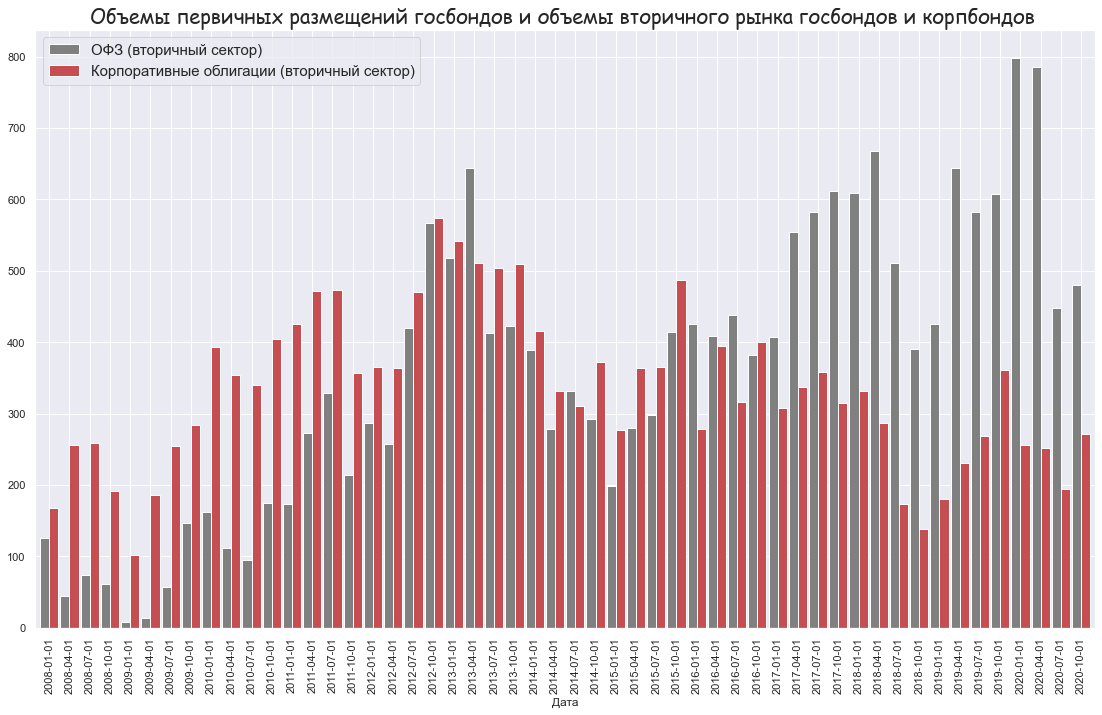

In [135]:
rc={'figure.figsize':(19,11)}
ax = qd.plot.bar(color=["grey", 'r'],  width=0.9)
ax.set_title('Объемы первичных размещений госбондов и объемы вторичного рынка госбондов и корпбондов ', fontfamily = 'fantasy',fontstyle = 'oblique',
                fontsize = 20)
ax.xaxis.set_major_formatter(plt.FixedFormatter(qd.index.to_series().dt.strftime("%Y-%m-%d")))
plt.legend(loc = 'upper left',fontsize = 15)
# plt.savefig("econd", dpi=200)
plt.show()

In [136]:
b = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
quarter = ['Q1', 'Q2', 'Q3', 'Q4']
new1 = ['2013Q3','2013Q4']
for i in b:
    for j in quarter:
        b = str(i)+j
        new1.append(b)

In [137]:
st = []
for i in range(22,52):
    st.append(df.iloc[3*i:3*i+3, 6].mean())

In [138]:
dataa2 = {'Значение ставки':st}
qd2=pd.DataFrame(data = dataa2, index=new1)
qd2 = qd2.reset_index()
qd2 = qd2.rename(columns={'index':'Дата'})

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

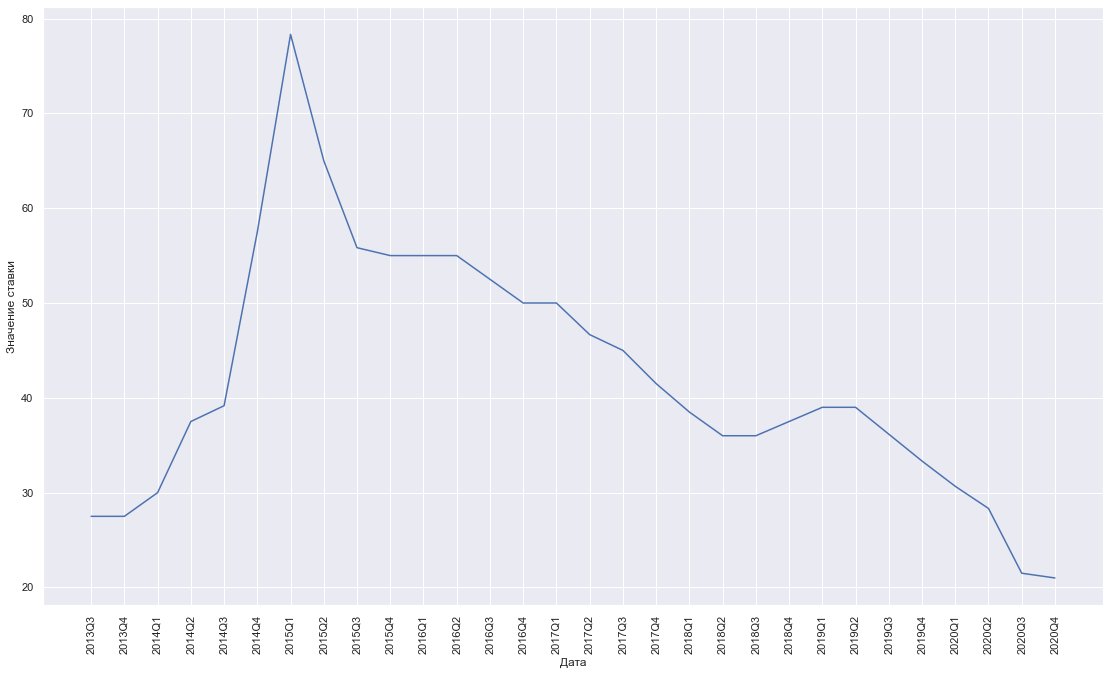

In [139]:
sns.lineplot(data = qd2, x = 'Дата', y = 'Значение ставки')
plt.xticks(rotation = 90)

In [140]:
b = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
quarter = ['Q1', 'Q2', 'Q3', 'Q4']
new1 = ['2013Q3','2013Q4']
for i in b:
    for j in quarter:
        b = str(i)+j
        new1.append(b)

In [146]:
ofz2 = []
corp2=[]
for i in range(22,52):
    ofz2.append(df.iloc[3*i:3*i+3, [4,5]].mean()[0])
    corp2.append(df.iloc[3*i:3*i+3, [4,5]].mean()[1])
    

In [147]:
dataa = {'ОФЗ (вторичный сектор)' : ofz2,'Корпоративные облигации (вторичный сектор)':corp2}
qd=pd.DataFrame(data = dataa, index=new1)
qd = qd.reset_index()
qd = qd.rename(columns={'index':'Дата'})

In [148]:
qd['Дата'] = pd.to_datetime(qd['Дата'])
qd.set_index('Дата', inplace=True)
qd1 = qd.stack().reset_index().set_index('Дата').rename(columns={'level_1': 'Status', 0: 'Values'})

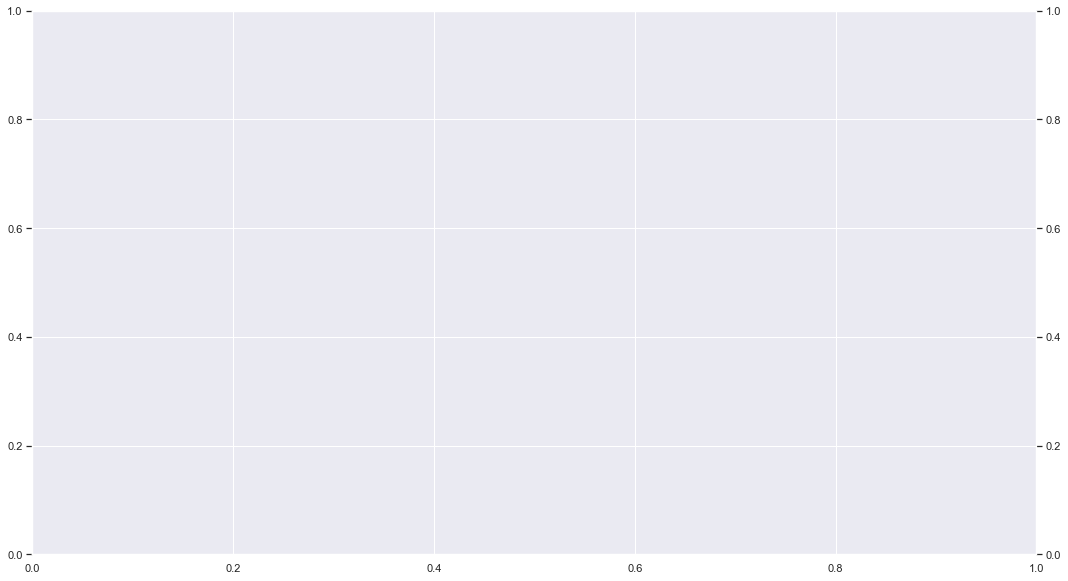

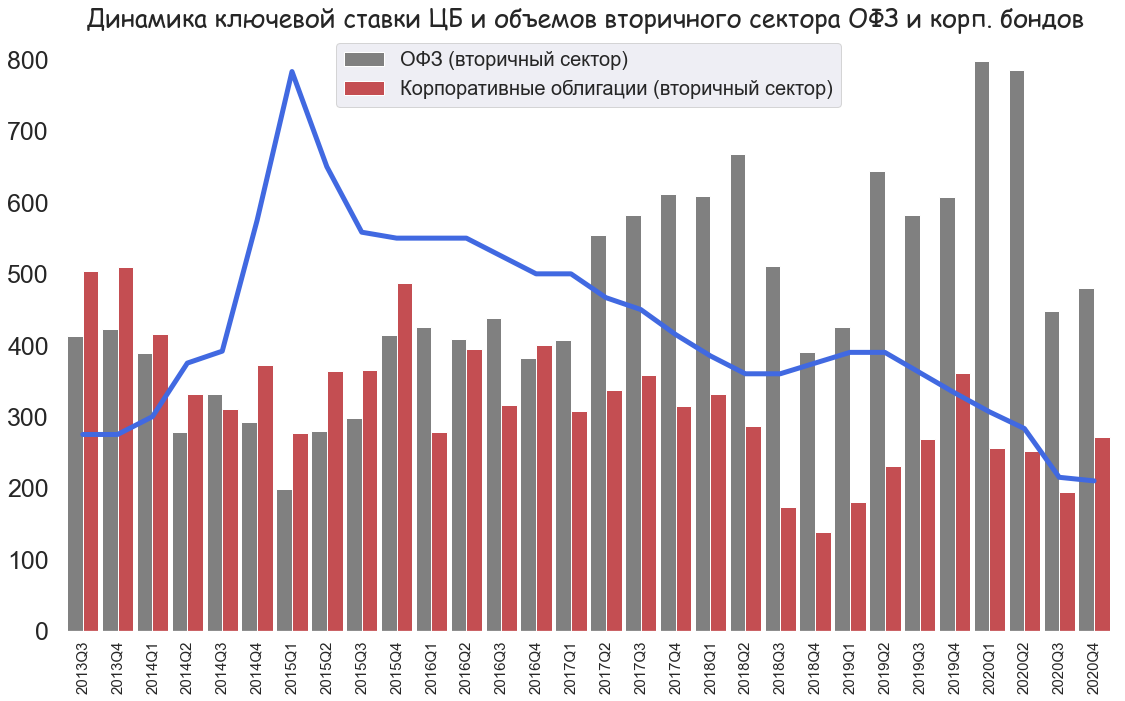

In [164]:
fig, ax = plt.subplots(figsize=(18, 10))
ax2 = ax.twinx()
ax = qd.plot.bar(color=["grey", 'r'],  width=0.9)
ax.grid()
ax.xaxis.set_major_formatter(plt.FixedFormatter(qd.index.to_series().dt.strftime("%Y-%m-%d")))
ax.set_xlabel('')
sns.lineplot(data = qd2, x = 'Дата', y = 'Значение ставки', color = 'royalblue', linewidth = 5)
plt.title('Динамика ключевой ставки ЦБ и объемов вторичного сектора ОФЗ и корп. бондов ', fontfamily = 'fantasy',fontstyle = 'oblique',
                fontsize = 25)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(new1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 25)
ax.legend(loc = 'best',fontsize = 20)
plt.savefig("3", dpi=200)
plt.grid()
ax.set_facecolor('white')
plt.show()

In [150]:
df['Ставка']*=5

In [151]:
b = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
quarter = ['Q1', 'Q2', 'Q3', 'Q4']
new1 = ['2013Q3','2013Q4']
for i in b:
    for j in quarter:
        b = str(i)+j
        new1.append(b)

In [152]:
st = []
for i in range(22,52):
    st.append(df.iloc[3*i:3*i+3, 6].mean())

In [153]:
b1 = []
for i in range(22,52):
    b1.append(df.iloc[3*i:3*i+3, 9].mean())

In [154]:
b2 = []
for i in range(22,52):
    b2.append(df.iloc[3*i:3*i+3, 10].mean())

In [155]:
b3 = []
for i in range(22,52):
    b3.append(df.iloc[3*i:3*i+3, 11].mean())

In [156]:
b4 = []
for i in range(22,52):
    b4.append(df.iloc[3*i:3*i+3, 13].mean())

In [157]:
dataa2 = {'Значение ставки':st, 'Cbonds-CBI RU BBB/ruAA- YTM eff':b1, 'Cbonds-CBI RU BB/ruBBB YTM eff':b2,'Cbonds-CBI RU B/ruB- YTM eff':b3, 'Cbonds-GBI RU YTM eff':b4}
qd2=pd.DataFrame(data = dataa2, index=new1)
qd2 = qd2.reset_index()
qd2 = qd2.rename(columns={'index':'Дата'})

In [159]:
qd2['Значение ставки'] = qd2['Значение ставки']*2

In [76]:
qd2

,Дата,Значение ставки,Cbonds-CBI RU BBB/ruAA- YTM eff,Cbonds-CBI RU BB/ruBBB YTM eff,Cbonds-CBI RU B/ruB- YTM eff,Cbonds-GBI RU YTM eff
0,2013Q3,6.875000,7.896667,8.290000,9.500000,7.230000
1,2013Q4,6.875000,7.863333,8.323333,9.600000,7.376667
2,2014Q1,7.500000,8.250000,8.756667,10.080000,8.200000
3,2014Q2,9.375000,9.063333,9.540000,10.363333,8.706667
4,2014Q3,9.791667,9.776667,10.330000,11.516667,9.436667
5,2014Q4,14.375000,12.916667,15.460000,13.996667,11.490000
6,2015Q1,19.583333,15.116667,15.596667,17.443333,13.253333
7,2015Q2,16.250000,12.256667,12.806667,14.633333,10.910000
8,2015Q3,13.958333,12.146667,12.916667,14.380000,11.193333
9,2015Q4,13.750000,11.300000,12.276667,14.010000,9.930000


No handles with labels found to put in legend.


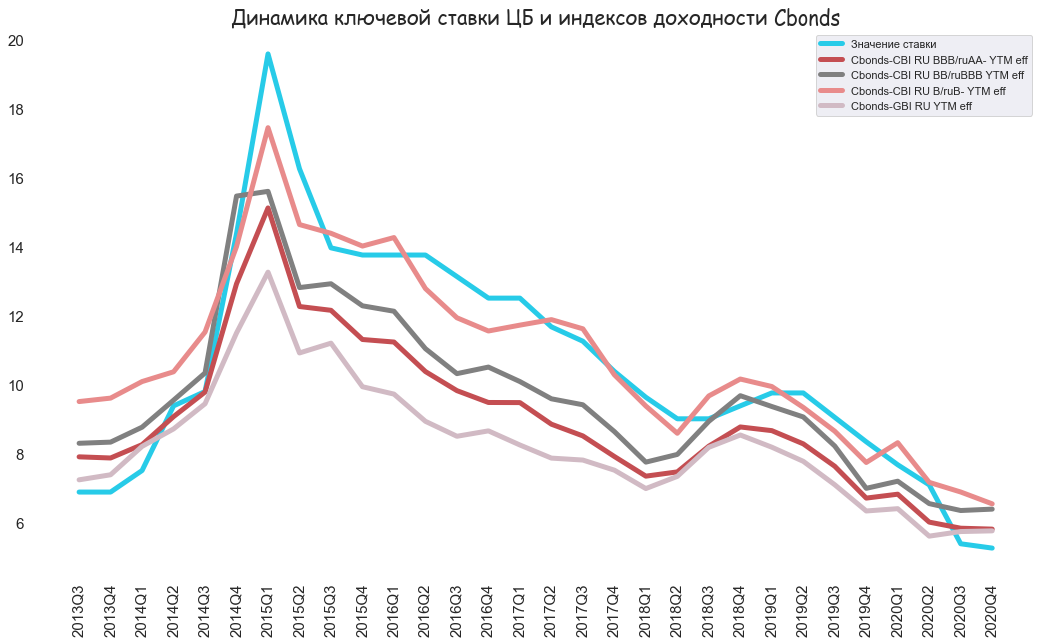

In [97]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.lineplot(data = qd2, x = 'Дата', y = 'Значение ставки', color = '#27cbe8', linewidth = 5)
plt.legend('Значение ставки')
sns.lineplot(data = qd2, x = 'Дата', y = 'Cbonds-CBI RU BBB/ruAA- YTM eff', color = 'r', linewidth = 5)
sns.lineplot(data = qd2, x = 'Дата', y = 'Cbonds-CBI RU BB/ruBBB YTM eff', color = 'grey', linewidth = 5)
sns.lineplot(data = qd2, x = 'Дата', y = 'Cbonds-CBI RU B/ruB- YTM eff', color = '#e88b8b', linewidth = 5)
sns.lineplot(data = qd2, x = 'Дата', y = 'Cbonds-GBI RU YTM eff', color = '#d1bac4', linewidth = 5)
ax.legend(loc = 'best',fontsize = 35)
plt.legend(['Значение ставки', 'Cbonds-CBI RU BBB/ruAA- YTM eff', 'Cbonds-CBI RU BB/ruBBB YTM eff', 'Cbonds-CBI RU B/ruB- YTM eff', 'Cbonds-GBI RU YTM eff'])
plt.xticks(rotation = 90,fontsize =15)
plt.yticks(fontsize =15)
plt.title('Динамика ключевой ставки ЦБ и индексов доходности Cbonds', fontfamily = 'fantasy',fontstyle = 'oblique',
                fontsize = 20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_facecolor('white')
plt.savefig("4", dpi=200)
plt.grid()
plt.show()